<a href="https://colab.research.google.com/github/mohammedzmar/electricity_load_forecasting_using_LSTM_RNN/blob/main/electricity_load_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Electricity load Prediction using LSTM & RNN**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,LSTM,Dropout,SimpleRNN
from keras.models import Sequential 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

### **Dataset**


In [ ]:
data = pd.read_excel('demand.xlsx',usecols='A')

In [ ]:
data


,load_forecast
0,1056.9
1,1057.1
2,996.5
3,955.8
4,918.0
...,...
40147,1181.4
40148,1196.8
40149,1163.3
40150,1136.0


In [ ]:
data=np.array(data).reshape(-1,1)

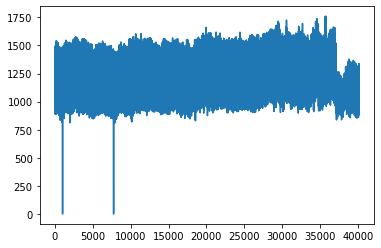

In [ ]:
plt.plot(data)
plt.show()

In [ ]:
#normalization
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [ ]:
len(data)# number of hours  

40152

In [ ]:
train = data[0:32121,:] #80% of data for train
test = data[32122:,:]# 20% of data for test

In [ ]:
def get_data(data, steps):      
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(data[i+steps, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
#to look back for the 24 hours
steps = 24

In [ ]:
X_train, y_train = get_data(train, steps)
X_test, y_test = get_data(test, steps)

In [ ]:

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

### **LSTM Model**

In [ ]:
model = Sequential()
model.add(LSTM(100,activation='ReLU',return_sequences=True, input_shape = (1, steps)))
model.add(Dropout(0.2))  
model.add(LSTM(80,activation='ReLU',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,activation='ReLU',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(30,activation='ReLU'))                                  
model.add(Dense(1))   

In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 1, 100)            50000     
                                                                 
 dropout_66 (Dropout)        (None, 1, 100)            0         
                                                                 
 lstm_49 (LSTM)              (None, 1, 80)             57920     
                                                                 
 dropout_67 (Dropout)        (None, 1, 80)             0         
                                                                 
 lstm_50 (LSTM)              (None, 1, 50)             26200     
                                                                 
 dropout_68 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_51 (LSTM)              (None, 30)              

In [ ]:
model.compile(loss = 'MSE', optimizer = 'adam')
model.fit(X_train, y_train, epochs=15, batch_size=50)

Epoch 1/15
642/642 [==============================] - 11s 10ms/step - loss: 0.0315
Epoch 2/15
642/642 [==============================] - 6s 10ms/step - loss: 0.0030
Epoch 3/15
642/642 [==============================] - 11s 18ms/step - loss: 0.0018
Epoch 4/15
642/642 [==============================] - 12s 18ms/step - loss: 0.0013
Epoch 5/15
642/642 [==============================] - 6s 10ms/step - loss: 0.0011
Epoch 6/15
642/642 [==============================] - 9s 14ms/step - loss: 8.9128e-04
Epoch 7/15
642/642 [==============================] - 7s 12ms/step - loss: 8.1695e-04
Epoch 8/15
642/642 [==============================] - 7s 11ms/step - loss: 7.1030e-04
Epoch 9/15
642/642 [==============================] - 6s 9ms/step - loss: 6.2031e-04
Epoch 10/15
642/642 [==============================] - 6s 9ms/step - loss: 5.7301e-04
Epoch 11/15
642/642 [==============================] - 6s 9ms/step - loss: 5.4038e-04
Epoch 12/15
642/642 [==============================] - 6s 9ms/step - los

In [ ]:
lstm_pred = model.predict(X_test)

251/251 [==============================] - 1s 3ms/step


In [ ]:
score=r2_score(y_test,lstm_pred)
print(score)

0.962933733291537


In [ ]:
mse_lstm=round(mean_squared_error(y_test,lstm_pred),4)
rmse_lstm=round(np.sqrt(mse_lstm),4)
mae_lstm =round(mae(y_test,lstm_pred),4)
print("Mean Squared Error for LSTM model: ",mse_lstm)
print("Root Mean Squared Error for LSTM model: ",rmse_lstm)
print("Mean Absolute Error for LSTM model: ",mae_lstm)

Mean Squared Error for LSTM model:  0.0004
Root Mean Squared Error for LSTM model:  0.02
Mean Absolute Error for LSTM model:  0.0148


In [ ]:
y_pred = scaler.inverse_transform(lstm_pred)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

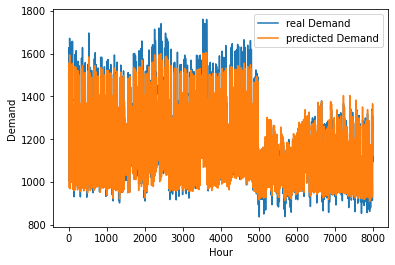

In [ ]:
plt.plot(y_test, label = 'real Demand')
plt.plot(y_pred, label = 'predicted Demand')
plt.xlabel('Hour')
plt.ylabel('Demand')
plt.legend()
plt.show()

# **RNN Model**

In [ ]:
rnnmodel = Sequential()
rnnmodel.add(SimpleRNN(40, activation='tanh', return_sequences = True, input_shape=(1,steps)))
rnnmodel.add(Dropout(0.15))
rnnmodel.add(SimpleRNN(50, activation='tanh', return_sequences = True))
rnnmodel.add(Dropout(0.1))
rnnmodel.add(SimpleRNN(10, activation='tanh'))
rnnmodel.add(Dropout(0.2))
rnnmodel.add(Dense(1))
rnnmodel.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_30 (SimpleRNN)   (None, 1, 40)             2600      
                                                                 
 dropout_69 (Dropout)        (None, 1, 40)             0         
                                                                 
 simple_rnn_31 (SimpleRNN)   (None, 1, 50)             4550      
                                                                 
 dropout_70 (Dropout)        (None, 1, 50)             0         
                                                                 
 simple_rnn_32 (SimpleRNN)   (None, 10)                610       
                                                                 
 dropout_71 (Dropout)        (None, 10)                0         
                                                                 
 dense_23 (Dense)            (None, 1)               

In [ ]:
rnnmodel.compile(optimizer="adam",loss="MSE")
rnnmodel.fit(X_train,y_train,epochs=15,batch_size=50)

Epoch 1/15
642/642 [==============================] - 5s 4ms/step - loss: 0.0380
Epoch 2/15
642/642 [==============================] - 3s 5ms/step - loss: 0.0081
Epoch 3/15
642/642 [==============================] - 3s 4ms/step - loss: 0.0039
Epoch 4/15
642/642 [==============================] - 3s 4ms/step - loss: 0.0021
Epoch 5/15
642/642 [==============================] - 3s 4ms/step - loss: 0.0015
Epoch 6/15
642/642 [==============================] - 2s 4ms/step - loss: 0.0012
Epoch 7/15
642/642 [==============================] - 2s 4ms/step - loss: 0.0011
Epoch 8/15
642/642 [==============================] - 4s 6ms/step - loss: 0.0010
Epoch 9/15
642/642 [==============================] - 3s 4ms/step - loss: 9.6477e-04
Epoch 10/15
642/642 [==============================] - 2s 4ms/step - loss: 9.2154e-04
Epoch 11/15
642/642 [==============================] - 2s 4ms/step - loss: 8.7728e-04
Epoch 12/15
642/642 [==============================] - 2s 4ms/step - loss: 8.7984e-04
Epoch 13/

In [ ]:
rnnpredict = rnnmodel.predict(X_test)
rnnscore=r2_score(y_test,rnnpredict)
print("R2 score for RNN: ",rnnscore)

251/251 [==============================] - 1s 2ms/step
R2 score for RNN:  0.9802034546964683


In [ ]:
mse_rnn=round(mean_squared_error(y_test,rnnpredict),4)
rmse_rnn=round(np.sqrt(mse_rnn),4)
mae_rnn =round(mae(y_test,rnnpredict),4)
print("Mean Squared Error for RNN model: ",mse_rnn)
print("Root Mean Squared Error for RNN model: ",rmse_rnn)
print("Mean Absolute Error for RNN model: ",mae_rnn)



Mean Squared Error for RNN model:  0.0002
Root Mean Squared Error for RNN model:  0.0141
Mean Absolute Error for RNN model:  0.0117


In [ ]:
rnn_pred = scaler.inverse_transform(rnnpredict)


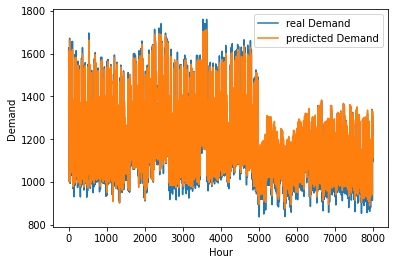

In [ ]:
plt.plot(y_test, label = 'real Demand')
plt.plot(rnn_pred, label = 'predicted Demand')
plt.xlabel('Hour')
plt.ylabel('Demand')
plt.legend()
plt.show()